In [121]:
import pandas as pd
import numpy as np
import collections
import re
import operator #
import matplotlib.pyplot as plt
from itertools import islice
%matplotlib inline

In [28]:
#Load the dataset
data = pd.read_csv("/Users/Rohit/Desktop/Data/test.txt", sep="\t")
data.shape

(3614506, 5)

In [29]:
data[data.AnonID==479].head()

,AnonID,Query,QueryTime,ItemRank,ClickURL
0,479,family guy,2006-03-01 16:01:20,NaN,NaN
1,479,also sprach zarathustra,2006-03-02 14:48:55,NaN,NaN
2,479,family guy movie references,2006-03-03 22:37:46,1.0,http://www.familyguyfiles.com
3,479,top grossing movies of all time,2006-03-03 22:42:42,1.0,http://movieweb.com
4,479,top grossing movies of all time,2006-03-03 22:42:42,2.0,http://www.imdb.com


In [72]:
userlist = data.AnonID.unique()
len(userlist) #No of unique users

66000

In [159]:
querylist = data.Query.unique()
len(querylist)

# fig.savefig('asdf.png')

In [163]:
queries = data.Query
faqcount = queries.value_counts().head()
faqueries = queries.value_counts().head().index
faq = pd.DataFrame()
faq['Query']= faqueries = queries.value_counts().index
faq['Count']= queries.value_counts().head()
faq

,Query,Count
0,-,NaN
1,google,NaN
2,yahoo,NaN
3,ebay,NaN
4,yahoo.com,NaN


In [88]:
def numRanks(df):
    x =df[df.ItemRank<=2.0].ItemRank.count()/df.Query.count() 
    return x

In [89]:
numRanks(userDict[479])

0.4065040650406504

In [80]:
userDict= {}
for user in userlist:
    userDict[user]= data[data.AnonID==user]

In [102]:
userUsage={}
singleUser=0
for user in userDict.keys():
    if numRanks(userDict[user])>0.8:
        if userDict[user].shape[0]==1:
            singleUser= singleUser+1
        userUsage[user]=numRanks(userDict[user])

In [98]:
len(userUsage)

2136

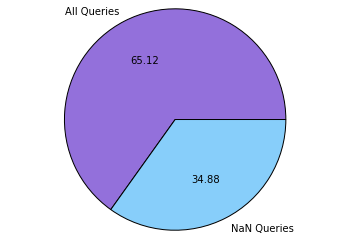

In [177]:
cleandata = data.dropna()
plt.figure()
values1 = [data.shape[0]/data.shape[0],cleandata.shape[0]/data.shape[0]] 
labels1 = ['All Queries', 'NaN Queries'] 
colors1 = ['mediumpurple','lightskyblue'] 
plt.pie(values1, labels=labels1, autopct='%.2f', colors=colors1)
plt.axis('equal')
plt.savefig('NaNQueries.png')
plt.show()

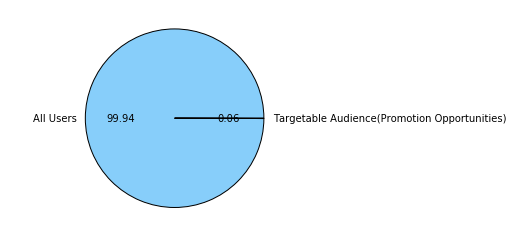

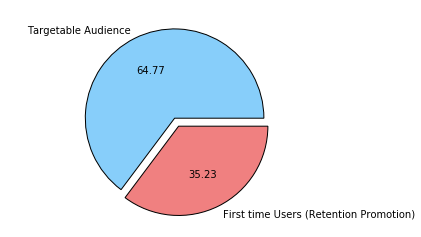

In [176]:
plt.figure()
values1 = [(data.shape[0]/data.shape[0]),(len(userUsage)/data.shape[0])] 
labels1 = ['All Users', 'Targetable Audience(Promotion Opportunities)'] 
colors1 = ['lightskyblue', 'lightcoral'] 
plt.axis('equal')
plt.pie(values1, labels=labels1, autopct='%.2f', colors=colors1)
plt.savefig('TargetAudience.png')
plt.show()
values2 = [(len(userUsage)/len(userUsage)), (singleUser/len(userUsage))] 
labels2 = ['Targetable Audience', 'First time Users (Retention Promotion)'] 
colors2= ['yellowgreen', 'mediumpurple']
plt.axis('equal')
explode1 = (0, 0.1)
plt.pie(values2, labels=labels2, autopct='%.2f', explode=explode1, colors=colors1)
plt.savefig('RententionPlans.png')
plt.show()